# Geometric Transformations of Images

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('74707.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('res74707.jpg',res)

True

In [ ]:
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('res274707.jpg',res)

In [4]:
img = cv2.imread('74707.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img = cv2.imread('74707.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

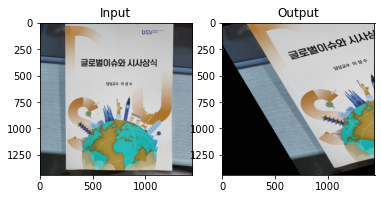

In [12]:
img = cv2.imread('book.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

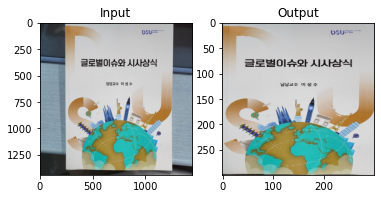

In [11]:
img = cv2.imread('book.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[232,0],[1259,0],[247,1400],[1239,1400]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

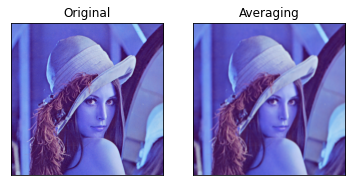

In [3]:
img = cv2.imread('lena.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# 1.4.4 Image Blurring (Image Smoothing)

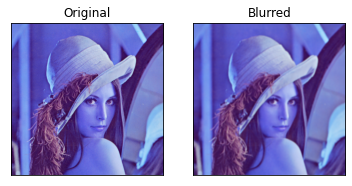

In [4]:
img = cv2.imread('lena.png')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

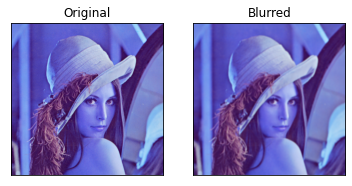

In [5]:
img = cv2.imread('lena.png')

blur = cv2.blur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

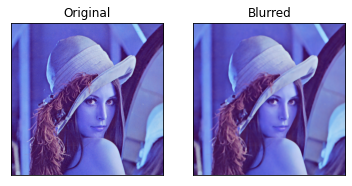

In [6]:
img = cv2.imread('lena.png')

median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

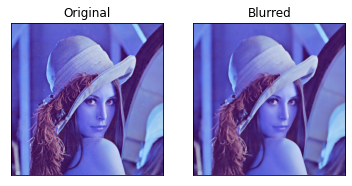

In [7]:
img = cv2.imread('lena.png')

blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
l=1
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],np.float32)

In [4]:
kernel

array([[ 0., -1.,  0.],
       [-1.,  5., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [5]:
img = np.random.randint(10, size=(12,12))

In [6]:
img

array([[0, 9, 9, 3, 0, 2, 2, 5, 3, 4, 1, 6],
       [3, 0, 6, 7, 9, 9, 2, 0, 9, 5, 7, 7],
       [5, 8, 5, 9, 9, 5, 2, 4, 4, 4, 6, 1],
       [1, 4, 2, 5, 2, 6, 5, 0, 7, 6, 8, 9],
       [7, 0, 2, 6, 9, 7, 1, 5, 3, 8, 5, 6],
       [3, 9, 8, 4, 8, 4, 8, 6, 1, 6, 8, 9],
       [1, 9, 2, 4, 2, 8, 5, 7, 6, 2, 5, 7],
       [2, 4, 4, 2, 6, 5, 7, 8, 5, 7, 5, 3],
       [1, 6, 1, 1, 9, 1, 8, 7, 7, 2, 0, 3],
       [3, 0, 6, 0, 0, 9, 7, 6, 5, 2, 1, 1],
       [0, 0, 6, 0, 2, 8, 3, 9, 4, 6, 7, 5],
       [1, 2, 1, 9, 9, 8, 4, 9, 7, 2, 1, 5]])

In [7]:
h,w = img.shape

In [8]:
print (h,w)

12 12


In [9]:
dst = np.zeros((h,w),np.int)

C:\Users\U301-11\AppData\Local\Temp\ipykernel_9188\2160328971.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dst = np.zeros((h,w),np.int)


In [10]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i,j]=t

In [11]:
img

array([[0, 9, 9, 3, 0, 2, 2, 5, 3, 4, 1, 6],
       [3, 0, 6, 7, 9, 9, 2, 0, 9, 5, 7, 7],
       [5, 8, 5, 9, 9, 5, 2, 4, 4, 4, 6, 1],
       [1, 4, 2, 5, 2, 6, 5, 0, 7, 6, 8, 9],
       [7, 0, 2, 6, 9, 7, 1, 5, 3, 8, 5, 6],
       [3, 9, 8, 4, 8, 4, 8, 6, 1, 6, 8, 9],
       [1, 9, 2, 4, 2, 8, 5, 7, 6, 2, 5, 7],
       [2, 4, 4, 2, 6, 5, 7, 8, 5, 7, 5, 3],
       [1, 6, 1, 1, 9, 1, 8, 7, 7, 2, 0, 3],
       [3, 0, 6, 0, 0, 9, 7, 6, 5, 2, 1, 1],
       [0, 0, 6, 0, 2, 8, 3, 9, 4, 6, 7, 5],
       [1, 2, 1, 9, 9, 8, 4, 9, 7, 2, 1, 5]])

In [12]:
dst

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, -26,   9,   8,  20,  27,  -3, -20,  33,   1,  16,   0],
       [  0,  26,   0,  19,  20,  -1,  -6,  14,  -4,  -1,  10,   0],
       [  0,   9,  -6,   6, -19,  11,  16, -21,  22,   3,  14,   0],
       [  0, -22,  -6,  10,  22,  15, -20,  15,  -6,  20,  -5,   0],
       [  0,  25,  23,  -6,  21, -11,  24,   9, -16,  11,  15,   0],
       [  0,  29, -15,  10, -16,  24,  -5,  10,  15, -14,   3,   0],
       [  0,  -1,  11,  -5,  12,   3,   9,  14,  -3,  21,  10,   0],
       [  0,  24, -12,  -7,  37, -26,  18,   6,  16,  -6, -11,   0],
       [  0, -15,  23,  -7, -20,  29,   9,   2,   6,  -4,  -5,   0],
       [  0,  -8,  23, -17,  -7,  18, -13,  23,  -7,  15,  22,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [20]:
img = cv2.imread('lena.png', 0)

In [21]:
h,w=img.shape

In [22]:
dst = np.zeros((h-2*l,w-2*l),np.uint8)

In [23]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

In [24]:
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()